In [2]:
import sqlite3
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
!cp -r ../Scrapers/data .
!cp ../Scrapers/nfl.db data/

# ATS Records Directly After ATS Loss

In [ ]:
# ATS Record Without Playoffs

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team
        elif spread_result < 0:
            return away_team
        else:
            return "Push"
    except (ValueError, TypeError):
        return "Invalid spread"

# Updated Queries with 'week' column included
query_cowboys_2022_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2022 AND game_type = 'REG';
"""

query_lions_2022_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2022 AND game_type = 'REG';
"""

query_cowboys_2023_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2023 AND game_type = 'REG';
"""

query_lions_2023_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2023 AND game_type = 'REG';
"""

query_cowboys_2024_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2024 AND game_type = 'REG';
"""

query_lions_2024_reg = """
SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2024 AND game_type = 'REG';
"""

# Execute the queries for 2022, 2023, and 2024 regular seasons
cursor.execute(query_cowboys_2022_reg)
cowboys_scores_2022_reg = cursor.fetchall()

cursor.execute(query_lions_2022_reg)
lions_scores_2022_reg = cursor.fetchall()

cursor.execute(query_cowboys_2023_reg)
cowboys_scores_2023_reg = cursor.fetchall()

cursor.execute(query_lions_2023_reg)
lions_scores_2023_reg = cursor.fetchall()

cursor.execute(query_cowboys_2024_reg)
cowboys_scores_2024_reg = cursor.fetchall()

cursor.execute(query_lions_2024_reg)
lions_scores_2024_reg = cursor.fetchall()

# Close the connection
conn.close()

# Initialize variables to track ATS records for regular season only
cowboys_ats_wins_2022_reg, cowboys_ats_losses_2022_reg = 0, 0
lions_ats_wins_2022_reg, lions_ats_losses_2022_reg = 0, 0
cowboys_ats_wins_2023_reg, cowboys_ats_losses_2023_reg = 0, 0
lions_ats_wins_2023_reg, lions_ats_losses_2023_reg = 0, 0
cowboys_ats_wins_2024_reg, cowboys_ats_losses_2024_reg = 0, 0
lions_ats_wins_2024_reg, lions_ats_losses_2024_reg = 0, 0

# Calculate Cowboys ATS record for 2022 regular season
for game in cowboys_scores_2022_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DAL":
        cowboys_ats_wins_2022_reg += 1
    elif winner == away_team or winner == home_team:
        cowboys_ats_losses_2022_reg += 1

# Calculate Lions ATS record for 2022 regular season
for game in lions_scores_2022_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DET":
        lions_ats_wins_2022_reg += 1
    elif winner == away_team or winner == home_team:
        lions_ats_losses_2022_reg += 1

# Calculate Cowboys ATS record for 2023 regular season
for game in cowboys_scores_2023_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DAL":
        cowboys_ats_wins_2023_reg += 1
    elif winner == away_team or winner == home_team:
        cowboys_ats_losses_2023_reg += 1

# Calculate Lions ATS record for 2023 regular season
for game in lions_scores_2023_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DET":
        lions_ats_wins_2023_reg += 1
    elif winner == away_team or winner == home_team:
        lions_ats_losses_2023_reg += 1

# Calculate Cowboys ATS record for 2024 regular season
for game in cowboys_scores_2024_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DAL":
        cowboys_ats_wins_2024_reg += 1
    elif winner == away_team or winner == home_team:
        cowboys_ats_losses_2024_reg += 1

# Calculate Lions ATS record for 2024 regular season
for game in lions_scores_2024_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner == "DET":
        lions_ats_wins_2024_reg += 1
    elif winner == away_team or winner == home_team:
        lions_ats_losses_2024_reg += 1

# Print the results for all regular seasons
print(f"Cowboys 2023 REG Season ATS: {cowboys_ats_wins_2023_reg}W - {cowboys_ats_losses_2023_reg}L")
print(f"Cowboys 2022 REG Season ATS: {cowboys_ats_wins_2022_reg}W - {cowboys_ats_losses_2022_reg}L")
print(f"Cowboys 2024 REG Season ATS: {cowboys_ats_wins_2024_reg}W - {cowboys_ats_losses_2024_reg}L")
print()
print(f"Lions 2024 REG Season ATS: {lions_ats_wins_2024_reg}W - {lions_ats_losses_2024_reg}L")
print(f"Lions 2023 REG Season ATS: {lions_ats_wins_2023_reg}W - {lions_ats_losses_2023_reg}L")
print(f"Lions 2022 REG Season ATS: {lions_ats_wins_2022_reg}W - {lions_ats_losses_2022_reg}L")

# All ATS Losses from ^
# Store the losing games for Cowboys and Lions
cowboys_losing_games_2022 = []
cowboys_losing_games_2023 = []
lions_losing_games_2022 = []
lions_losing_games_2023 = []
cowboys_losing_games_2024 = []
lions_losing_games_2024 = []

# Calculate Cowboys and Lions losses for 2022, 2023, and 2024 regular seasons
for game in cowboys_scores_2022_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner != "DAL" and winner != "Push":
        cowboys_losing_games_2022.append(game)

for game in cowboys_scores_2023_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner != "DAL" and winner != "Push":
        cowboys_losing_games_2023.append(game)

for game in cowboys_scores_2024_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    if home_score is not None and away_score is not None:  # Only process played games
        winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
        if winner != "DAL" and winner != "Push":
            cowboys_losing_games_2024.append(game)

for game in lions_scores_2022_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner != "DET" and winner != "Push":
        lions_losing_games_2022.append(game)

for game in lions_scores_2023_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    if winner != "DET" and winner != "Push":
        lions_losing_games_2023.append(game)

for game in lions_scores_2024_reg:
    game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    if home_score is not None and away_score is not None:  # Only process played games
        winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
        if winner != "DET" and winner != "Push":
            lions_losing_games_2024.append(game)

# Convert to DataFrame for display with 'Week' included
df_cowboys_losses_2022 = pd.DataFrame(cowboys_losing_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

df_cowboys_losses_2023 = pd.DataFrame(cowboys_losing_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

df_cowboys_losses_2024 = pd.DataFrame(cowboys_losing_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

df_lions_losses_2022 = pd.DataFrame(lions_losing_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

df_lions_losses_2023 = pd.DataFrame(lions_losing_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

df_lions_losses_2024 = pd.DataFrame(lions_losing_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# Print the tables
# print()
# print("============================== Cowboys 2022 Losses ==============================")
# display(df_cowboys_losses_2022)
# print("\n============================== Cowboys 2023 Losses ==============================")
# display(df_cowboys_losses_2023)
# print("\n============================== Cowboys 2024 Losses ==============================")
# display(df_cowboys_losses_2024)
# print("\n============================== Lions 2022 Losses ================================")
# display(df_lions_losses_2022)
# print("\n============================== Lions 2023 Losses ================================")
# display(df_lions_losses_2023)
# print("\n============================== Lions 2024 Losses ================================")
# display(df_lions_losses_2024)

In [ ]:
# Finding the games directly after the ATS losses and calculating ATS w/l in those

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Extract game_ids of the losing games from the losses DataFrames
cowboys_losing_game_ids_2022 = df_cowboys_losses_2022['Game ID'].tolist()
cowboys_losing_game_ids_2023 = df_cowboys_losses_2023['Game ID'].tolist()
cowboys_losing_game_ids_2024 = df_cowboys_losses_2024['Game ID'].tolist()
lions_losing_game_ids_2022 = df_lions_losses_2022['Game ID'].tolist()
lions_losing_game_ids_2023 = df_lions_losses_2023['Game ID'].tolist()
lions_losing_game_ids_2024 = df_lions_losses_2024['Game ID'].tolist()

# Function to find the next game after a specific game_id for a team
def find_next_game(team, game_id):
    query = f"""
    SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
    FROM Games
    WHERE (home_team = '{team}' OR away_team = '{team}') 
    AND game_id > '{game_id}' 
    ORDER BY game_id ASC
    LIMIT 1;
    """
    cursor.execute(query)
    return cursor.fetchone()

# Find the next game for each team after each losing game
next_cowboys_games_2022 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2022]
next_cowboys_games_2023 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2023]
next_cowboys_games_2024 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2024]
next_lions_games_2022 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2022]
next_lions_games_2023 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2023]
next_lions_games_2024 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2024]

# Convert the results to DataFrames for easier display
df_next_cowboys_games_2022 = pd.DataFrame(next_cowboys_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_cowboys_games_2023 = pd.DataFrame(next_cowboys_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_cowboys_games_2024 = pd.DataFrame(next_cowboys_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2022 = pd.DataFrame(next_lions_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2023 = pd.DataFrame(next_lions_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2024 = pd.DataFrame(next_lions_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team
        elif spread_result < 0:
            return away_team
        else:
            return "Push"
    except (ValueError, TypeError):
        return "Invalid spread"

# Function to calculate ATS results for a team
def calculate_ats_for_next_games(df, team):
    ats_wins, ats_losses = 0, 0
    for _, row in df.iterrows():
        winner = determine_spread_winner(row['Home Team'], row['Away Team'], row['Home Score'], row['Away Score'], row['Home Spread'])
        if winner == team:
            ats_wins += 1
        elif winner == row['Away Team'] or winner == row['Home Team']:
            ats_losses += 1
    return ats_wins, ats_losses

# Calculate ATS for Cowboys and Lions for the next games
# cowboys_ats_wins_2023, cowboys_ats_losses_2023 = calculate_ats_for_next_games(df_next_cowboys_games_2023, 'DAL')
# cowboys_ats_wins_2024, cowboys_ats_losses_2024 = calculate_ats_for_next_games(df_next_cowboys_games_2024, 'DAL')
# lions_ats_wins_2023, lions_ats_losses_2023 = calculate_ats_for_next_games(df_next_lions_games_2023, 'DET')
# lions_ats_wins_2024, lions_ats_losses_2024 = calculate_ats_for_next_games(df_next_lions_games_2024, 'DET')
cowboys_ats_wins_2022, cowboys_ats_losses_2022 = calculate_ats_for_next_games(df_next_cowboys_games_2022, 'DAL')
cowboys_ats_wins_2023, cowboys_ats_losses_2023 = calculate_ats_for_next_games(df_next_cowboys_games_2023, 'DAL')
cowboys_ats_wins_2024, cowboys_ats_losses_2024 = calculate_ats_for_next_games(df_next_cowboys_games_2024, 'DAL')
lions_ats_wins_2022, lions_ats_losses_2022 = calculate_ats_for_next_games(df_next_lions_games_2022, 'DET')
lions_ats_wins_2023, lions_ats_losses_2023 = calculate_ats_for_next_games(df_next_lions_games_2023, 'DET')
lions_ats_wins_2024, lions_ats_losses_2024 = calculate_ats_for_next_games(df_next_lions_games_2024, 'DET')

# Print the ATS results
print(f"\nCowboys 2022 ATS Record After ATS Loss: {cowboys_ats_wins_2022}W - {cowboys_ats_losses_2022}L")
print(f"Cowboys 2023 ATS Record After ATS Loss: {cowboys_ats_wins_2023}W - {cowboys_ats_losses_2023}L")
print(f"Cowboys 2024 ATS Record After ATS Loss: {cowboys_ats_wins_2024}W - {cowboys_ats_losses_2024}L")
print()
print(f"Lions 2022 ATS Record After ATS Loss: {lions_ats_wins_2022}W - {lions_ats_losses_2022}L")
print(f"Lions 2023 ATS Record After ATS Loss: {lions_ats_wins_2023}W - {lions_ats_losses_2023}L")
print(f"Lions 2024 ATS Record After ATS Loss: {lions_ats_wins_2024}W - {lions_ats_losses_2024}L")

# Display the next games
print()
# print("\n============================== Cowboys 2022 ==============================")
# display(df_next_cowboys_games_2022)
# print("\n============================== Cowboys 2023 ==============================")
# display(df_next_cowboys_games_2023)
# print("\n============================== Cowboys 2024 ==============================")
# display(df_next_cowboys_games_2024)
# print("\n============================== Lions 2022 ==============================")
# display(df_next_lions_games_2022)
# print("\n============================== Lions 2023 ==============================")
# display(df_next_lions_games_2023)
# print("\n============================== Lions 2024 ==============================")
# display(df_next_lions_games_2024)

In [3]:
# LOOP ^
# ATS Records Directly After ATS Loss 

teams = [
    'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE',
    'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC',
    'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NE', 'NO', 'NYG',
    'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS'
]

# Seasons to analyze
seasons = [2020, 2021, 2022, 2023, 2024]

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team  # Home team covers
        elif spread_result < 0:
            return away_team  # Away team covers
        else:
            return "Push"     # Neither team covers
    except (ValueError, TypeError):
        return "Invalid spread"

# Function to find the next game after a specific game_id for a team in the same season
def find_next_game(team, game_id, season):
    query = f"""
    SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
    FROM Games
    WHERE (home_team = '{team}' OR away_team = '{team}')
    AND season = {season} AND game_type = 'REG'
    AND game_id > '{game_id}' 
    ORDER BY game_id ASC
    LIMIT 1;
    """
    cursor.execute(query)
    return cursor.fetchone()

# Connect to the database
db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Dictionaries to store results
ats_records = {}            # Overall ATS records per team per season
ats_losses = {}             # ATS losses per team per season
next_games_after_ats_loss = {}  # Next games after ATS losses
ats_records_after_loss = {}     # ATS records after ATS losses per team per season

# Loop over each team and season
for team in teams:
    ats_records[team] = {}
    ats_losses[team] = {}
    next_games_after_ats_loss[team] = {}
    ats_records_after_loss[team] = {}
    
    for season in seasons:
        # Initialize counters
        ats_wins = 0
        ats_losses_count = 0
        
        # Query the database for the team's games in the season
        query = f"""
        SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
        FROM Games
        WHERE (home_team = '{team}' OR away_team = '{team}') AND season = {season} AND game_type = 'REG';
        """
        cursor.execute(query)
        games = cursor.fetchall()
        
        # Skip to next season if no games are found (e.g., future seasons)
        if not games:
            continue
        
        # List to store games where the team did not cover the spread
        team_losing_games = []
        
        # Calculate ATS records
        for game in games:
            game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
            winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
            if winner == team:
                ats_wins += 1
            elif winner == away_team or winner == home_team:
                ats_losses_count += 1
                team_losing_games.append(game)
            # Skipping "Push" and "Invalid spread" cases
        
        # Store the overall ATS record
        ats_records[team][season] = {'ATS Wins': ats_wins, 'ATS Losses': ats_losses_count}
        
        # Store the losing games
        ats_losses[team][season] = team_losing_games
        
        # Find the next games after each ATS loss
        losing_game_ids = [game[0] for game in team_losing_games]  # Extract game_ids
        next_games = []
        for game_id in losing_game_ids:
            next_game = find_next_game(team, game_id, season)
            if next_game:
                next_games.append(next_game)
        next_games_after_ats_loss[team][season] = next_games
        
        # Calculate ATS record in the next games after losses
        ats_wins_after_loss = 0
        ats_losses_after_loss = 0
        for game in next_games:
            if game is None:
                continue
            game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
            winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
            if winner == "Game not played":
                continue  # Skip games not played yet
            if winner == team:
                ats_wins_after_loss += 1
            elif winner == away_team or winner == home_team:
                ats_losses_after_loss += 1
            # Skipping "Push" and "Invalid spread" cases
        
        # Store the ATS record after ATS losses
        ats_records_after_loss[team][season] = {
            'ATS Wins After Loss': ats_wins_after_loss,
            'ATS Losses After Loss': ats_losses_after_loss
        }

# Close the database connection
conn.close()

# Print the overall ATS records per team per season
overall_data = []
print("Overall ATS Records:")
for team in teams:
    print(f"\nTeam {team}:")
    for season in seasons:
        if season in ats_records[team]:
            record = ats_records[team][season]
            ats_wins = record['ATS Wins']
            ats_losses_count = record['ATS Losses']
            print(f"  {season} REG Season ATS: {record['ATS Wins']}W - {record['ATS Losses']}L")
        else:
            ats_wins = None
            ats_losses_count = None
            print(f"  {season} REG Season ATS: No data")

        overall_data.append({
            'Team': team,
            'Season': season,
            'ATS Wins': ats_wins,
            'ATS Losses': ats_losses_count
        })
df_overall_ats = pd.DataFrame(overall_data)
overall_output_csv_path = 'data/all_teams_overall_ats_records.csv'
df_overall_ats.to_csv(overall_output_csv_path, index=False)
print(f"\nOverall ATS records have been saved to {overall_output_csv_path}")

# Print the ATS records after ATS losses per team per season
data = []
print("\nATS Records After ATS Loss:")
for team in teams:
    print(f"\nTeam {team}:")
    for season in seasons:
        if season in ats_records_after_loss[team]:
            record_after_loss = ats_records_after_loss[team][season]
            ats_wins_after_loss = record_after_loss['ATS Wins After Loss']
            ats_losses_after_loss = record_after_loss['ATS Losses After Loss']
            print(f"  {season} ATS Record After ATS Loss: {record_after_loss['ATS Wins After Loss']}W - {record_after_loss['ATS Losses After Loss']}L")
        else:
            ats_wins_after_loss = None
            ats_losses_after_loss = None
            print(f"  {season} ATS Record After ATS Loss: No data")

        data.append({
            'Team': team,
            'Season': season,
            'ATS Wins After Loss': ats_wins_after_loss,
            'ATS Losses After Loss': ats_losses_after_loss
        })
        
df_ats_after_loss = pd.DataFrame(data)
output_csv_path = 'data/all_teams_ats_results_after_ATS_losses.csv'
df_ats_after_loss.to_csv(output_csv_path, index=False)
print(f"\nResults have been saved to {output_csv_path}")


Overall ATS Records:

Team ARI:
  2020 REG Season ATS: 7W - 9L
  2021 REG Season ATS: 10W - 7L
  2022 REG Season ATS: 8W - 9L
  2023 REG Season ATS: 9W - 8L
  2024 REG Season ATS: 2W - 0L

Team ATL:
  2020 REG Season ATS: 7W - 9L
  2021 REG Season ATS: 6W - 10L
  2022 REG Season ATS: 8W - 8L
  2023 REG Season ATS: 5W - 12L
  2024 REG Season ATS: 1W - 1L

Team BAL:
  2020 REG Season ATS: 10W - 6L
  2021 REG Season ATS: 7W - 10L
  2022 REG Season ATS: 6W - 9L
  2023 REG Season ATS: 11W - 6L
  2024 REG Season ATS: 0W - 2L

Team BUF:
  2020 REG Season ATS: 11W - 5L
  2021 REG Season ATS: 9W - 6L
  2022 REG Season ATS: 8W - 7L
  2023 REG Season ATS: 7W - 10L
  2024 REG Season ATS: 1W - 1L

Team CAR:
  2020 REG Season ATS: 9W - 7L
  2021 REG Season ATS: 5W - 12L
  2022 REG Season ATS: 9W - 8L
  2023 REG Season ATS: 4W - 11L
  2024 REG Season ATS: 0W - 2L

Team CHI:
  2020 REG Season ATS: 8W - 8L
  2021 REG Season ATS: 7W - 9L
  2022 REG Season ATS: 5W - 10L
  2023 REG Season ATS: 8W - 6L
  2

In [ ]:
!open data/all_teams_overall_ats_records.csv
!open data/all_teams_ats_results_after_ATS_losses.csv

# ATS Records Directly After Straight Up Loss

In [ ]:
# Overall Record Without Playoffs

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Query to fetch all regular season Cowboys and Lions games for 2022, 2023, and 2024
query_all_data = """
SELECT game_id, week, home_team, away_team, home_score, away_score, season, game_type
FROM Games
WHERE (home_team = 'DAL' OR away_team = 'DAL' OR home_team = 'DET' OR away_team = 'DET')
AND (season = 2022 OR season = 2023 OR season = 2024);
"""

# Execute the query and fetch results
cursor.execute(query_all_data)
all_data = cursor.fetchall()

# Close the connection
conn.close()

# Initialize dictionaries to track W/L records for each team per season
team_records = {}

# Iterate through the fetched game data and calculate W/L/D records
for game in all_data:
    game_id, week, home_team, away_team, home_score, away_score, season, game_type = game
    
    if game_type == 'REG' and home_score is not None and away_score is not None:  # Consider only regular season and played games
        # Initialize the team record for home and away team if not already in the dictionary
        if home_team not in team_records:
            team_records[home_team] = {2022: {'W': 0, 'L': 0, 'D': 0}, 2023: {'W': 0, 'L': 0, 'D': 0}, 2024: {'W': 0, 'L': 0, 'D': 0}}
        if away_team not in team_records:
            team_records[away_team] = {2022: {'W': 0, 'L': 0, 'D': 0}, 2023: {'W': 0, 'L': 0, 'D': 0}, 2024: {'W': 0, 'L': 0, 'D': 0}}
        
        # Update win/loss/draw records
        if home_score > away_score:
            team_records[home_team][season]['W'] += 1
            team_records[away_team][season]['L'] += 1
        elif home_score < away_score:
            team_records[away_team][season]['W'] += 1
            team_records[home_team][season]['L'] += 1
        else:
            team_records[home_team][season]['D'] += 1
            team_records[away_team][season]['D'] += 1

# Summarize the results for DAL and DET
cowboys_record = team_records.get('DAL', {})
lions_record = team_records.get('DET', {})

# Print results
print()
print(f"Cowboys 2022 REG Season: {cowboys_record[2022]['W']}W - {cowboys_record[2022]['L']}L - {cowboys_record[2022]['D']}D")
print(f"Cowboys 2023 REG Season: {cowboys_record[2023]['W']}W - {cowboys_record[2023]['L']}L - {cowboys_record[2023]['D']}D")
print(f"Cowboys 2024 REG Season: {cowboys_record[2024]['W']}W - {cowboys_record[2024]['L']}L - {cowboys_record[2024]['D']}D")
print()
print(f"Lions 2022 REG Season: {lions_record[2022]['W']}W - {lions_record[2022]['L']}L - {lions_record[2022]['D']}D")
print(f"Lions 2023 REG Season: {lions_record[2023]['W']}W - {lions_record[2023]['L']}L - {lions_record[2023]['D']}D")
print(f"Lions 2024 REG Season: {lions_record[2024]['W']}W - {lions_record[2024]['L']}L - {lions_record[2024]['D']}D")

# Filter loss games and store in lists for DataFrames
cowboys_losses_2022 = [game for game in all_data if 'DAL' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2022 and ((game[2] == 'DAL' and game[4] < game[5]) or (game[3] == 'DAL' and game[4] > game[5]))]
cowboys_losses_2023 = [game for game in all_data if 'DAL' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2023 and ((game[2] == 'DAL' and game[4] < game[5]) or (game[3] == 'DAL' and game[4] > game[5]))]
cowboys_losses_2024 = [game for game in all_data if 'DAL' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2024 and ((game[2] == 'DAL' and game[4] < game[5]) or (game[3] == 'DAL' and game[4] > game[5]))]

lions_losses_2022 = [game for game in all_data if 'DET' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2022 and ((game[2] == 'DET' and game[4] < game[5]) or (game[3] == 'DET' and game[4] > game[5]))]
lions_losses_2023 = [game for game in all_data if 'DET' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2023 and ((game[2] == 'DET' and game[4] < game[5]) or (game[3] == 'DET' and game[4] > game[5]))]
lions_losses_2024 = [game for game in all_data if 'DET' in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == 2024 and ((game[2] == 'DET' and game[4] < game[5]) or (game[3] == 'DET' and game[4] > game[5]))]

# Convert to DataFrames for easier display
df_cowboys_losses_2022 = pd.DataFrame(cowboys_losses_2022, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
df_cowboys_losses_2023 = pd.DataFrame(cowboys_losses_2023, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
df_cowboys_losses_2024 = pd.DataFrame(cowboys_losses_2024, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])

df_lions_losses_2022 = pd.DataFrame(lions_losses_2022, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
df_lions_losses_2023 = pd.DataFrame(lions_losses_2023, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
df_lions_losses_2024 = pd.DataFrame(lions_losses_2024, columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])

# Print the tables
print()
print()
# print("============================== Cowboys 2022 Losses ==============================")
# display(df_cowboys_losses_2022)
# print("\n============================== Cowboys 2023 Losses ==============================")
# display(df_cowboys_losses_2023)
# print("\n============================== Cowboys 2024 Losses ==============================")
# display(df_cowboys_losses_2024)
# print("\n============================== Lions 2022 Losses ================================")
# display(df_lions_losses_2022)
# print("\n============================== Lions 2023 Losses ================================")
# display(df_lions_losses_2023)
# print("\n============================== Lions 2024 Losses ================================")
# display(df_lions_losses_2024)

In [ ]:
# Finding the games directly after straight up losses and calculating ATS w/l in those

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Extract game_ids of the losing games from the losses DataFrames
cowboys_losing_game_ids_2022 = df_cowboys_losses_2022['Game ID'].tolist()
cowboys_losing_game_ids_2023 = df_cowboys_losses_2023['Game ID'].tolist()
cowboys_losing_game_ids_2024 = df_cowboys_losses_2024['Game ID'].tolist()
lions_losing_game_ids_2022 = df_lions_losses_2022['Game ID'].tolist()
lions_losing_game_ids_2023 = df_lions_losses_2023['Game ID'].tolist()
lions_losing_game_ids_2024 = df_lions_losses_2024['Game ID'].tolist()

# Function to find the next game after a specific game_id for a team
def find_next_game(team, game_id):
    query = f"""
    SELECT game_id, week, home_team, away_team, home_score, away_score, home_spread, away_spread
    FROM Games
    WHERE (home_team = '{team}' OR away_team = '{team}') 
    AND game_id > '{game_id}' 
    ORDER BY game_id ASC
    LIMIT 1;
    """
    cursor.execute(query)
    return cursor.fetchone()

# Find the next game for each team after each losing game
next_cowboys_games_2022 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2022]
next_cowboys_games_2023 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2023]
next_cowboys_games_2024 = [find_next_game('DAL', game_id) for game_id in cowboys_losing_game_ids_2024]
next_lions_games_2022 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2022]
next_lions_games_2023 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2023]
next_lions_games_2024 = [find_next_game('DET', game_id) for game_id in lions_losing_game_ids_2024]

# Convert the results to DataFrames for easier display
df_next_cowboys_games_2022 = pd.DataFrame(next_cowboys_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_cowboys_games_2023 = pd.DataFrame(next_cowboys_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_cowboys_games_2024 = pd.DataFrame(next_cowboys_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2022 = pd.DataFrame(next_lions_games_2022, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2023 = pd.DataFrame(next_lions_games_2023, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])
df_next_lions_games_2024 = pd.DataFrame(next_lions_games_2024, columns=[
    'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team
        elif spread_result < 0:
            return away_team
        else:
            return "Push"
    except (ValueError, TypeError):
        return "Invalid spread"

# Function to calculate ATS results for a team
def calculate_ats_for_next_games(df, team):
    ats_wins, ats_losses = 0, 0
    for _, row in df.iterrows():
        winner = determine_spread_winner(row['Home Team'], row['Away Team'], row['Home Score'], row['Away Score'], row['Home Spread'])
        if winner == team:
            ats_wins += 1
        elif winner == row['Away Team'] or winner == row['Home Team']:
            ats_losses += 1
    return ats_wins, ats_losses

# Calculate ATS for Cowboys and Lions for the next games
cowboys_ats_wins_2022, cowboys_ats_losses_2022 = calculate_ats_for_next_games(df_next_cowboys_games_2022, 'DAL')
cowboys_ats_wins_2023, cowboys_ats_losses_2023 = calculate_ats_for_next_games(df_next_cowboys_games_2023, 'DAL')
cowboys_ats_wins_2024, cowboys_ats_losses_2024 = calculate_ats_for_next_games(df_next_cowboys_games_2024, 'DAL')
lions_ats_wins_2022, lions_ats_losses_2022 = calculate_ats_for_next_games(df_next_lions_games_2022, 'DET')
lions_ats_wins_2023, lions_ats_losses_2023 = calculate_ats_for_next_games(df_next_lions_games_2023, 'DET')
lions_ats_wins_2024, lions_ats_losses_2024 = calculate_ats_for_next_games(df_next_lions_games_2024, 'DET')

# Print the ATS results
print()
print(f"Cowboys 2022 ATS Record After Straight Up Loss: {cowboys_ats_wins_2022}W - {cowboys_ats_losses_2022}L")
print(f"Cowboys 2023 ATS Record After Straight Up  Loss: {cowboys_ats_wins_2023}W - {cowboys_ats_losses_2023}L")
print(f"Cowboys 2024 ATS Record After Straight Up  Loss: {cowboys_ats_wins_2024}W - {cowboys_ats_losses_2024}L")
print()
print(f"Lions 2022 ATS Record After Straight Up  Loss: {lions_ats_wins_2022}W - {lions_ats_losses_2022}L")
print(f"Lions 2023 ATS Record After Straight Up  Loss: {lions_ats_wins_2023}W - {lions_ats_losses_2023}L")
print(f"Lions 2024 ATS Record After Straight Up  Loss: {lions_ats_wins_2024}W - {lions_ats_losses_2024}L")

# Display the next games
print()
# print("\n============================== Cowboys 2022 ==============================")
# display(df_next_cowboys_games_2022)
# print("\n============================== Cowboys 2023 ==============================")
# display(df_next_cowboys_games_2023)
# print("\n============================== Cowboys 2024 ==============================")
# display(df_next_cowboys_games_2024)
# print("\n============================== Lions 2022 ==============================")
# display(df_next_lions_games_2022)
# print("\n============================== Lions 2023 ==============================")
# display(df_next_lions_games_2023)
# print("\n============================== Lions 2024 ==============================")
# display(df_next_lions_games_2024)

In [4]:
# LOOP ^
# ATS Records Directly After Straight Up Loss 

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Fetch all TeamIDs from the Teams table
query_teams = "SELECT TeamID FROM Teams;"
cursor.execute(query_teams)
team_ids = [team[0] for team in cursor.fetchall()]

# Query to fetch all regular season games for all teams from 2020 to 2024
query_all_data = """
SELECT game_id, week, home_team, away_team, home_score, away_score, season, game_type
FROM Games
WHERE season BETWEEN 2020 AND 2024;
"""

# Execute the query and fetch results
cursor.execute(query_all_data)
all_data = cursor.fetchall()

# Close the connection
conn.close()

# Initialize dictionaries to track W/L/D records for each team per season
team_records = {team: {2020: {'W': 0, 'L': 0, 'D': 0},
                       2021: {'W': 0, 'L': 0, 'D': 0},
                       2022: {'W': 0, 'L': 0, 'D': 0},
                       2023: {'W': 0, 'L': 0, 'D': 0},
                       2024: {'W': 0, 'L': 0, 'D': 0}}
                for team in team_ids}

# Iterate through the fetched game data and calculate W/L/D records
for game in all_data:
    game_id, week, home_team, away_team, home_score, away_score, season, game_type = game
    
    if game_type == 'REG' and home_score is not None and away_score is not None:  # Consider only regular season and played games
        # Update win/loss/draw records
        if home_score > away_score:
            team_records[home_team][season]['W'] += 1
            team_records[away_team][season]['L'] += 1
        elif home_score < away_score:
            team_records[away_team][season]['W'] += 1
            team_records[home_team][season]['L'] += 1
        else:
            team_records[home_team][season]['D'] += 1
            team_records[away_team][season]['D'] += 1

# Summarize and print the results for each team
for team in team_ids:
    print(f"\nTeam {team} Results:")
    for year in range(2020, 2024 + 1):
        record = team_records[team][year]
        print(f"{year} REG Season: {record['W']}W - {record['L']}L - {record['D']}D")

# Example: Fetch loss games for each team
team_losses = {}
for team in team_ids:
    team_losses[team] = {
        year: [game for game in all_data if team in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == year and (
            (game[2] == team and game[4] < game[5]) or (game[3] == team and game[4] > game[5]))]
        for year in range(2020, 2024 + 1)
    }
# team_losses
    
# # Example: Display losses for a specific team (replace 'DAL' with any team ID to display their results)
# for year in range(2020, 2024 + 1):
#     losses_df = pd.DataFrame(team_losses['DAL'][year], columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
#     print(f"\n============================== Dallas Cowboys {year} Losses ==============================")
#     display(losses_df)

# All teams ATS records after straight up loss loop

db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Fetch all TeamIDs from the Teams table
query_teams = "SELECT TeamID FROM Teams;"
cursor.execute(query_teams)
team_ids = [team[0] for team in cursor.fetchall()]

# Query to fetch all regular season games from 2020 to 2024
query_all_data = """
SELECT game_id, week, home_team, away_team, home_score, away_score, season, game_type, home_spread, away_spread
FROM Games
WHERE season BETWEEN 2020 AND 2024;
"""

# Execute the query and fetch results
cursor.execute(query_all_data)
all_data = cursor.fetchall()

# Close the connection
conn.close()

# Initialize a dictionary to track losses and subsequent games for each team
team_losses = {}
team_next_games = {}

# Iterate through the fetched game data and filter out losses for each team
for team in team_ids:
    # Store losses for each season
    team_losses[team] = {
        year: [game for game in all_data if team in (game[2], game[3]) and game[5] is not None and game[4] is not None and game[6] == year and (
            (game[2] == team and game[4] < game[5]) or (game[3] == team and game[4] > game[5]))]
        for year in range(2020, 2024 + 1)
    }

    # Find next game after each loss
    team_next_games[team] = {
        year: [next((g for g in all_data if team in (g[2], g[3]) and g[6] == year and g[1] > loss_game[1]), None) for loss_game in team_losses[team][year]]
        for year in range(2020, 2024 + 1)
    }

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team
        elif spread_result < 0:
            return away_team
        else:
            return "Push"
    except (ValueError, TypeError):
        return "Invalid spread"

# Function to calculate ATS results for each team's next games after losses
def calculate_ats_for_next_games(next_games, team):
    ats_wins, ats_losses = 0, 0
    for game in next_games:
        if game is not None:  # Ensure there is a next game
            winner = determine_spread_winner(game[2], game[3], game[4], game[5], game[8])  # game[8] is home_spread
            if winner == team:
                ats_wins += 1
            elif winner == game[3] or winner == game[2]:
                ats_losses += 1
    return ats_wins, ats_losses

# Iterate through all teams and calculate their ATS record for each season after a loss
all_teams_ats_results = []
for team in team_ids:
    print(f"\n{team} ATS Record After Straight Up Losses:")
    for year in range(2020, 2024 + 1):
        next_games = team_next_games[team][year]
        ats_wins, ats_losses = calculate_ats_for_next_games(next_games, team)
        all_teams_ats_results.append([team, year, ats_wins, ats_losses])
        print(f"{year}: {ats_wins}W - {ats_losses}L")

# Display loss games and next games for any specific team
# team_to_display = 'DAL'  # Change to any team you want to display
# for year in range(2020, 2024 + 1):
#     losses_df = pd.DataFrame(team_losses[team_to_display][year], columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type'])
#     next_games_df = pd.DataFrame([g for g in team_next_games[team_to_display][year] if g is not None], columns=['Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Season', 'Game Type', 'Home Spread', 'Away Spread'])
#     print(f"\n============================== {team_to_display} {year} Losses ==============================")
#     display(losses_df)
#     print(f"\n============================== {team_to_display} {year} Next Games After Loss ==============================")
#     display(next_games_df)

# Save to a CSV file
df_ats_results = pd.DataFrame(all_teams_ats_results, columns=['Team', 'Season', 'ATS Wins', 'ATS Losses'])
df_ats_results.to_csv('data/all_teams_ats_results_after_straight_up_losses.csv', index=False)


Team ARI Results:
2020 REG Season: 8W - 8L - 0D
2021 REG Season: 11W - 6L - 0D
2022 REG Season: 4W - 13L - 0D
2023 REG Season: 4W - 13L - 0D
2024 REG Season: 1W - 1L - 0D

Team ATL Results:
2020 REG Season: 4W - 12L - 0D
2021 REG Season: 7W - 10L - 0D
2022 REG Season: 7W - 10L - 0D
2023 REG Season: 7W - 10L - 0D
2024 REG Season: 1W - 1L - 0D

Team BAL Results:
2020 REG Season: 11W - 5L - 0D
2021 REG Season: 8W - 9L - 0D
2022 REG Season: 10W - 7L - 0D
2023 REG Season: 13W - 4L - 0D
2024 REG Season: 0W - 2L - 0D

Team BUF Results:
2020 REG Season: 13W - 3L - 0D
2021 REG Season: 11W - 6L - 0D
2022 REG Season: 13W - 3L - 0D
2023 REG Season: 11W - 6L - 0D
2024 REG Season: 2W - 0L - 0D

Team CAR Results:
2020 REG Season: 5W - 11L - 0D
2021 REG Season: 5W - 12L - 0D
2022 REG Season: 7W - 10L - 0D
2023 REG Season: 2W - 15L - 0D
2024 REG Season: 0W - 2L - 0D

Team CHI Results:
2020 REG Season: 8W - 8L - 0D
2021 REG Season: 6W - 11L - 0D
2022 REG Season: 3W - 14L - 0D
2023 REG Season: 7W - 10L 

In [ ]:
!open data/all_teams_ats_results_after_straight_up_losses.csv

# Visualizing Results

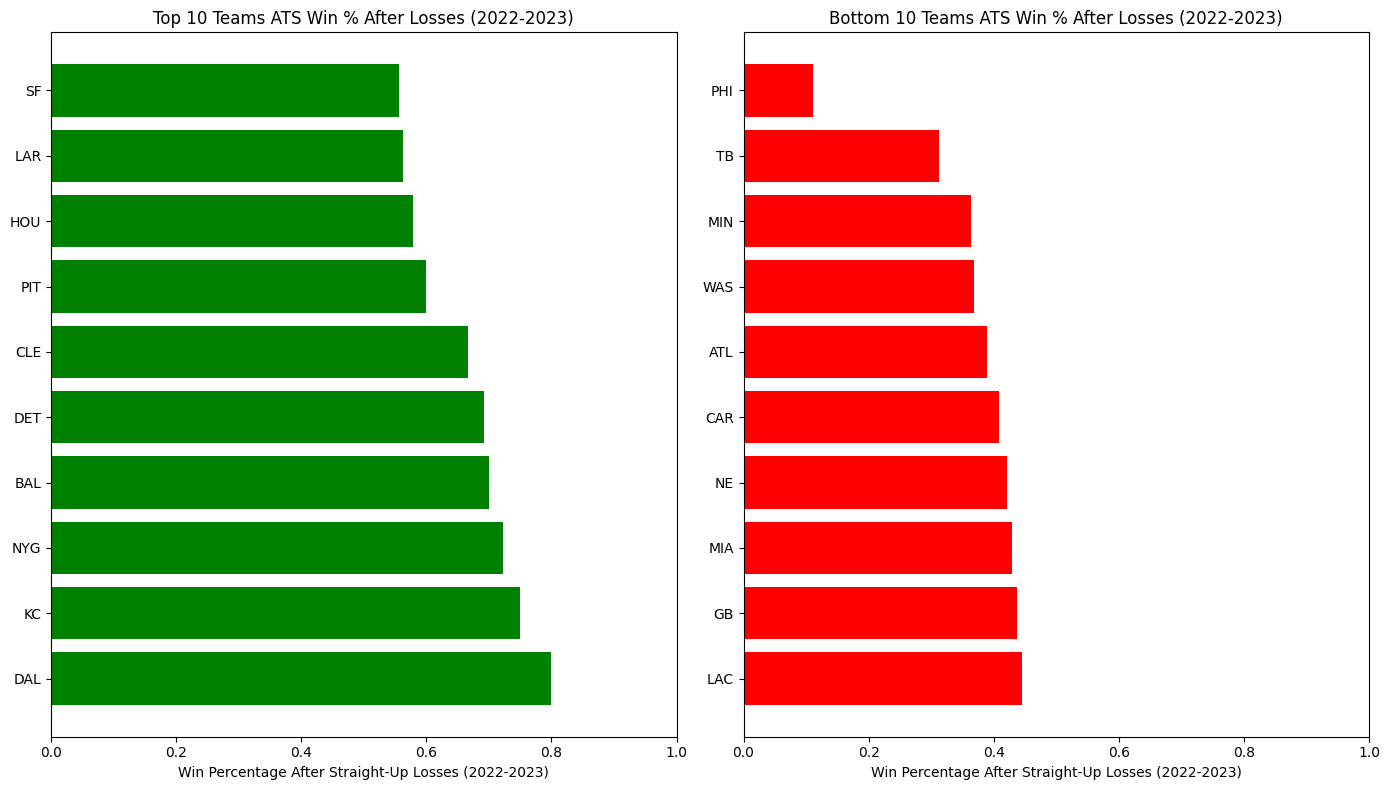

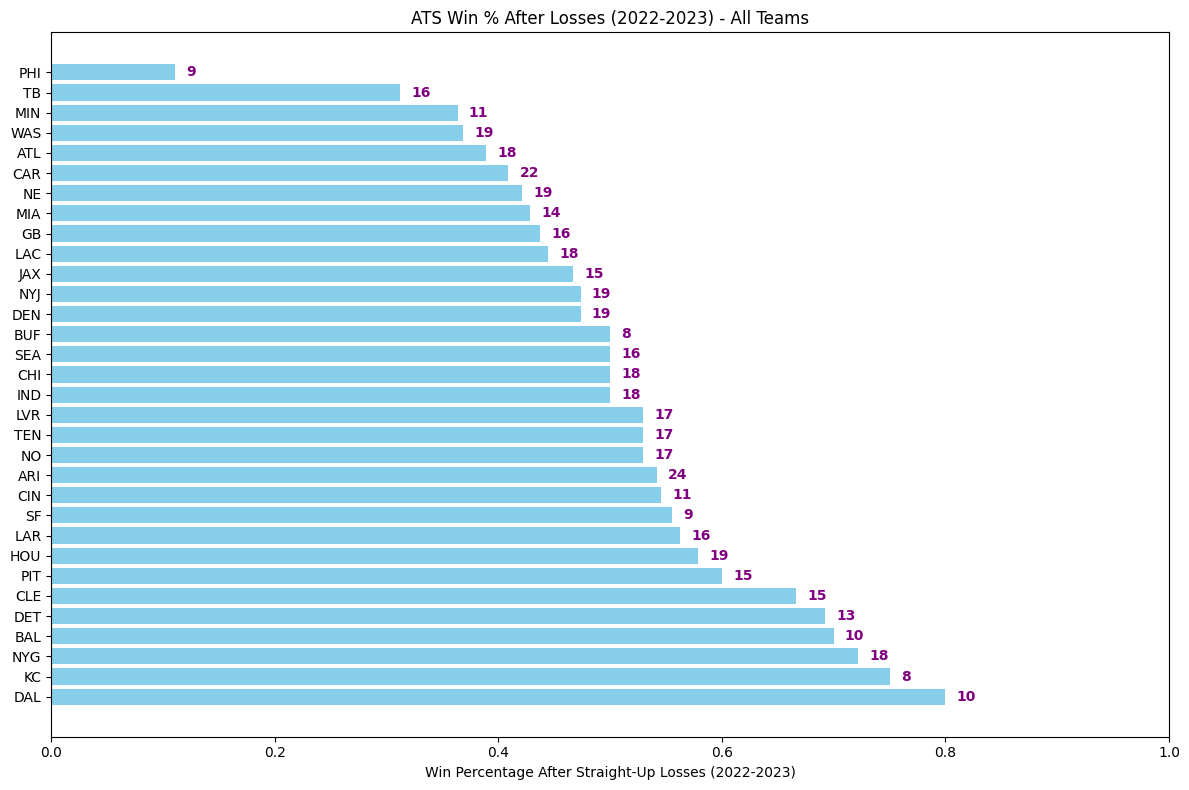

In [26]:
# ATS after straight up losses

df_ats_results = pd.read_csv('data/all_teams_ats_results_after_straight_up_losses.csv')

# Filter the data to include only the 2022 and 2023 seasons
df_filtered = df_ats_results[df_ats_results['Season'].isin([2022, 2023])]

# Add Win Percentage column
df_filtered['Win Percentage'] = df_filtered['ATS Wins'] / (df_filtered['ATS Wins'] + df_filtered['ATS Losses'])

# Recalculate team performance for 2022 and 2023 seasons only
# team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins', 'ATS Losses', 'Win Percentage']].mean()
team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins', 'ATS Losses']].sum()
team_performance_filtered['Win Percentage'] = team_performance_filtered['ATS Wins'] / (team_performance_filtered['ATS Wins'] + team_performance_filtered['ATS Losses'])

# Sort teams based on their average win percentage across these two seasons
top_performers_filtered = team_performance_filtered.sort_values(by='Win Percentage', ascending=False)

# Find top 10 and bottom 10 performers
top_teams_filtered = top_performers_filtered.head(10)
bottom_teams_filtered = top_performers_filtered.tail(10)

# Visualization for 2022 and 2023 seasons
plt.figure(figsize=(14, 8))

# Top teams' ATS Win Percentage for 2022 and 2023
top_teams_visual_filtered = top_teams_filtered.reset_index()
bottom_teams_visual_filtered = bottom_teams_filtered.reset_index()

# Bar plot for top 10 teams in 2022 and 2023
plt.subplot(1, 2, 1)
plt.barh(top_teams_visual_filtered['Team'], top_teams_visual_filtered['Win Percentage'], color='green')
plt.xlabel('Win Percentage After Straight-Up Losses (2022-2023)')
plt.title('Top 10 Teams ATS Win % After Losses (2022-2023)')
plt.xlim(0, 1)

# Bar plot for bottom 10 teams in 2022 and 2023
plt.subplot(1, 2, 2)
plt.barh(bottom_teams_visual_filtered['Team'], bottom_teams_visual_filtered['Win Percentage'], color='red')
plt.xlabel('Win Percentage After Straight-Up Losses (2022-2023)')
plt.title('Bottom 10 Teams ATS Win % After Losses (2022-2023)')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Create a single graph with all 32 teams' ATS win percentages for 2022 and 2023
print()
plt.figure(figsize=(12, 8))
all_teams_visual_filtered = team_performance_filtered.reset_index().sort_values(by='Win Percentage', ascending=False)
all_teams_visual_filtered['Total Games'] = all_teams_visual_filtered['ATS Wins'] + all_teams_visual_filtered['ATS Losses']
plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['Win Percentage'], color='skyblue')
for index, value in enumerate(all_teams_visual_filtered['Win Percentage']): # Add the total games to the end of the bars
    total_games = all_teams_visual_filtered['Total Games'].iloc[index]
    # plt.text(value + 0.02, index, f'{int(total_games)}', va='center', fontsize=10, color='black')
    plt.text(value + 0.01, index, f'{int(total_games)}', va='center', color='purple', fontweight='bold')
plt.xlabel('Win Percentage After Straight-Up Losses (2022-2023)')
plt.title('ATS Win % After Losses (2022-2023) - All Teams')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Enter the start year:  2023
Enter the end year (or leave blank for a single year):  


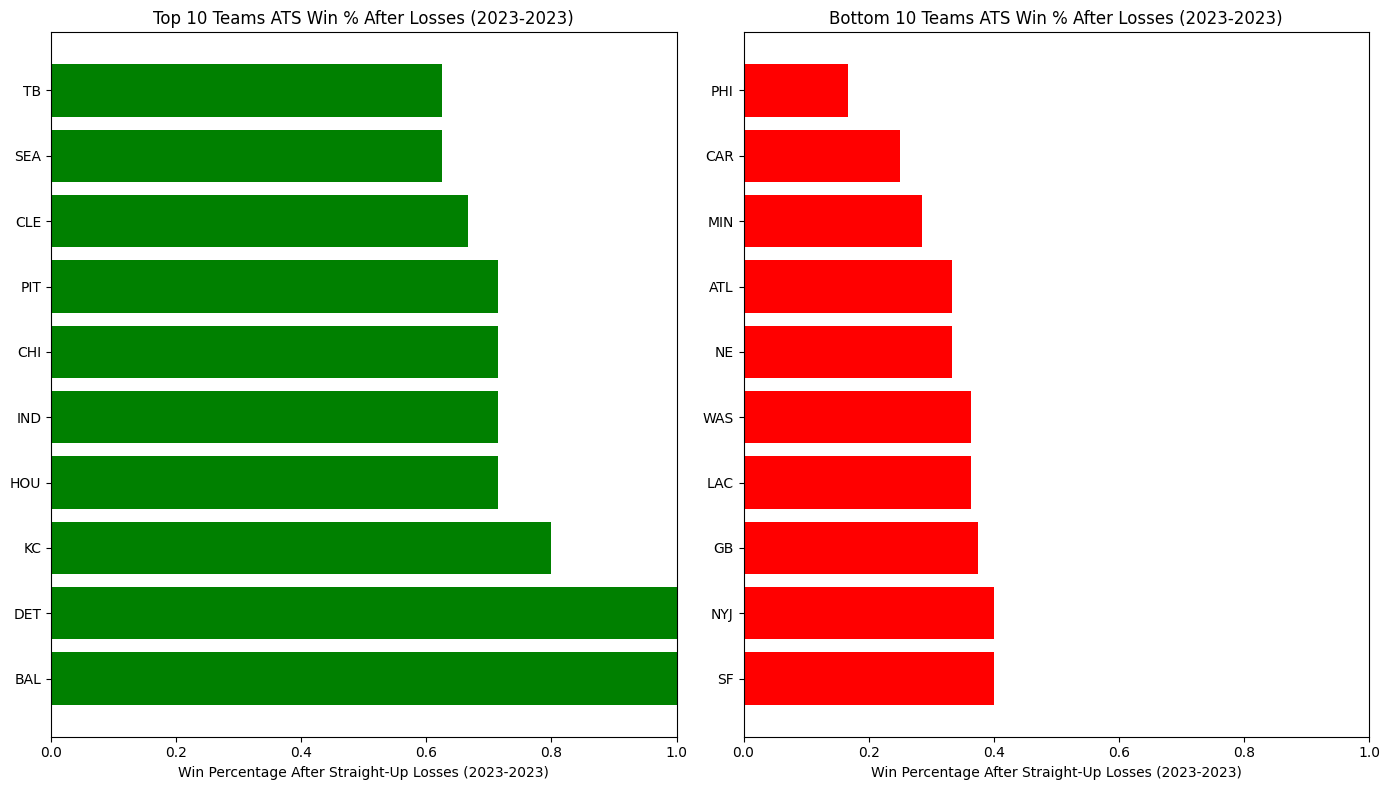

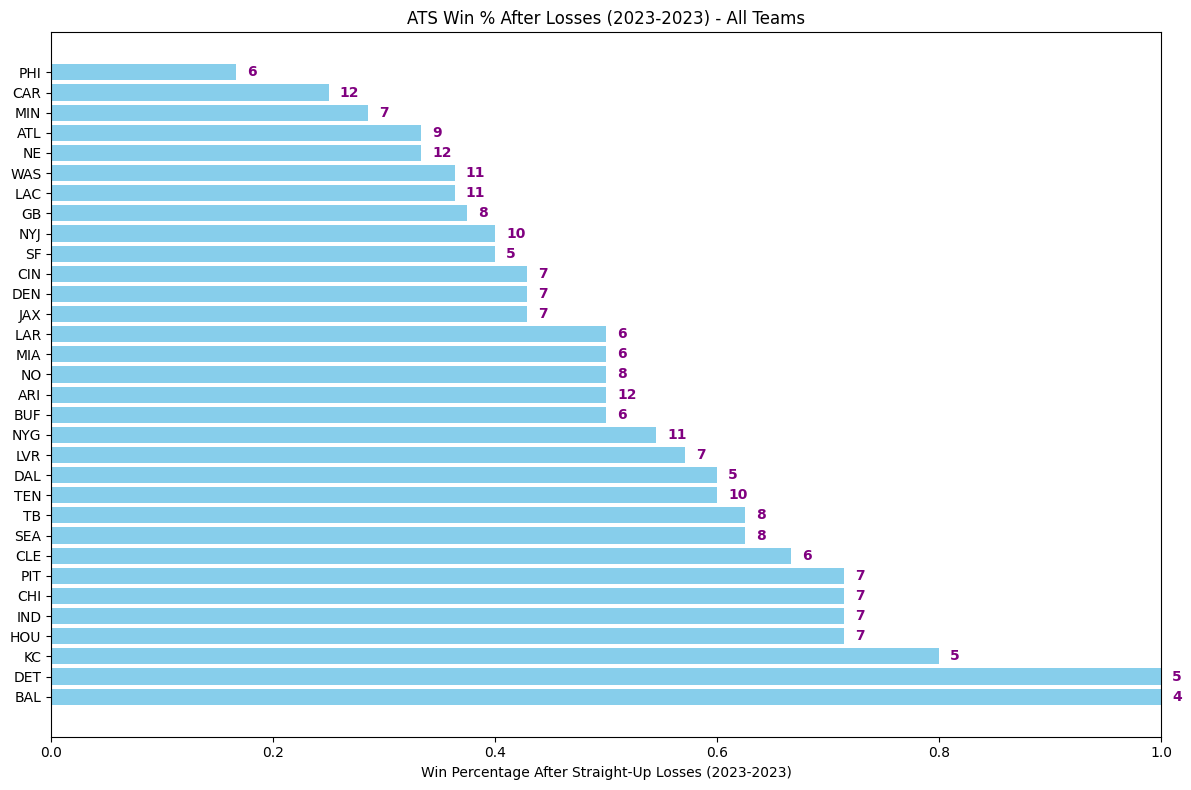

In [34]:
# ATS after straight up losses
# Function for dynamic years

start_year = int(input("Enter the start year: "))
end_year_input = input("Enter the end year (or leave blank for a single year): ")
if end_year_input == "":
    end_year = start_year
else:
    end_year = int(end_year_input)
# start_year = 2022  # For a single year, make start_year = end_year
# end_year = 2023    # If you want a single year, set both start_year and end_year the same

df_ats_results = pd.read_csv('data/all_teams_ats_results_after_straight_up_losses.csv')

# Filter the data to include only the specified range of years
df_filtered = df_ats_results[(df_ats_results['Season'] >= start_year) & (df_ats_results['Season'] <= end_year)]

# Sum ATS Wins and Losses for each team within the specified range
team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins', 'ATS Losses']].sum()

# Recalculate the win percentage based on the summed wins and losses
team_performance_filtered['Win Percentage'] = team_performance_filtered['ATS Wins'] / (team_performance_filtered['ATS Wins'] + team_performance_filtered['ATS Losses'])

# Sort teams based on their win percentage
team_performance_filtered = team_performance_filtered.sort_values(by='Win Percentage', ascending=False)

# Find top 10 and bottom 10 performers
top_teams_filtered = team_performance_filtered.head(10)
bottom_teams_filtered = team_performance_filtered.tail(10)

# Visualization for the specified range of seasons
plt.figure(figsize=(14, 8))

# Top teams' ATS Win Percentage for the specified seasons
top_teams_visual_filtered = top_teams_filtered.reset_index()
bottom_teams_visual_filtered = bottom_teams_filtered.reset_index()

# Bar plot for top 10 teams
plt.subplot(1, 2, 1)
plt.barh(top_teams_visual_filtered['Team'], top_teams_visual_filtered['Win Percentage'], color='green')
plt.xlabel(f'Win Percentage After Straight-Up Losses ({start_year}-{end_year})')
plt.title(f'Top 10 Teams ATS Win % After Losses ({start_year}-{end_year})')
plt.xlim(0, 1)

# Bar plot for bottom 10 teams
plt.subplot(1, 2, 2)
plt.barh(bottom_teams_visual_filtered['Team'], bottom_teams_visual_filtered['Win Percentage'], color='red')
plt.xlabel(f'Win Percentage After Straight-Up Losses ({start_year}-{end_year})')
plt.title(f'Bottom 10 Teams ATS Win % After Losses ({start_year}-{end_year})')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Create a single graph with all 32 teams' ATS win percentages for the specified seasons
print()
plt.figure(figsize=(12, 8))
all_teams_visual_filtered = team_performance_filtered.reset_index().sort_values(by='Win Percentage', ascending=False)
all_teams_visual_filtered['Total Games'] = all_teams_visual_filtered['ATS Wins'] + all_teams_visual_filtered['ATS Losses']

plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['Win Percentage'], color='skyblue')

# Add the total games to the end of the bars
for index, value in enumerate(all_teams_visual_filtered['Win Percentage']): 
    total_games = all_teams_visual_filtered['Total Games'].iloc[index]
    plt.text(value + 0.01, index, f'{int(total_games)}', va='center', color='purple', fontweight='bold')

plt.xlabel(f'Win Percentage After Straight-Up Losses ({start_year}-{end_year})')
plt.title(f'ATS Win % After Losses ({start_year}-{end_year}) - All Teams')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

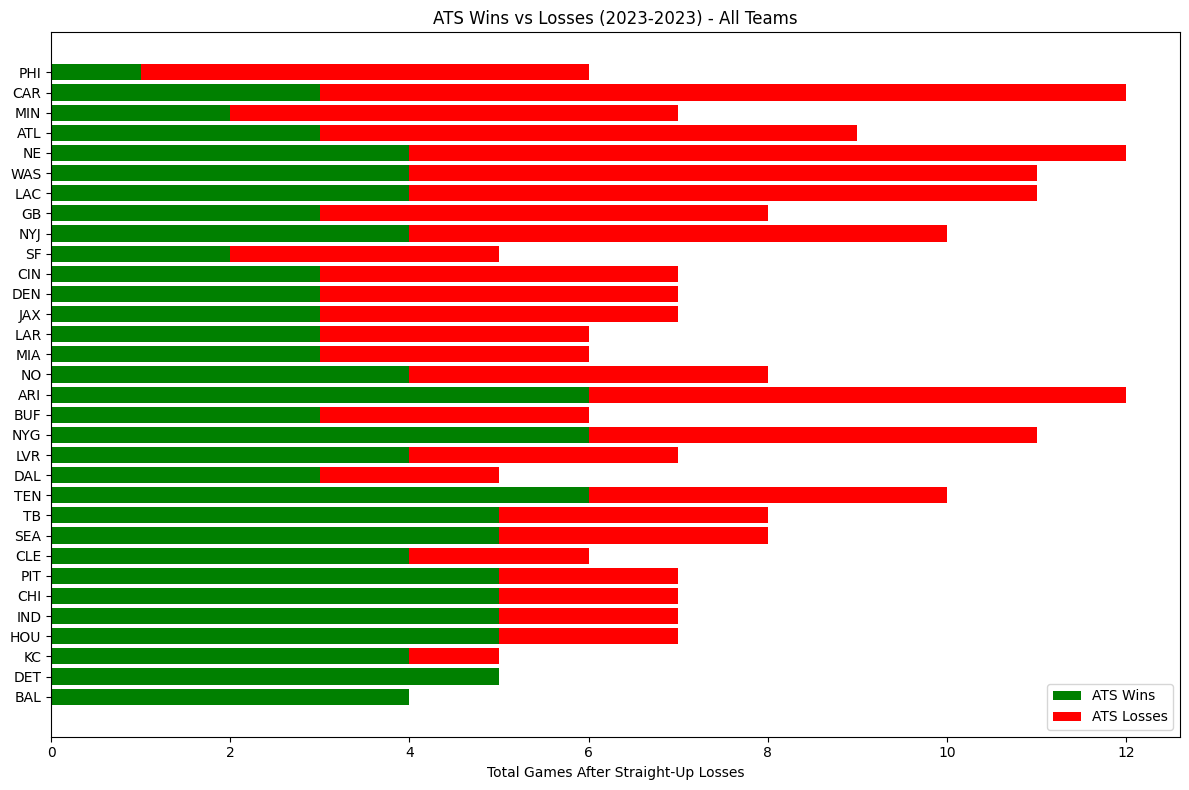

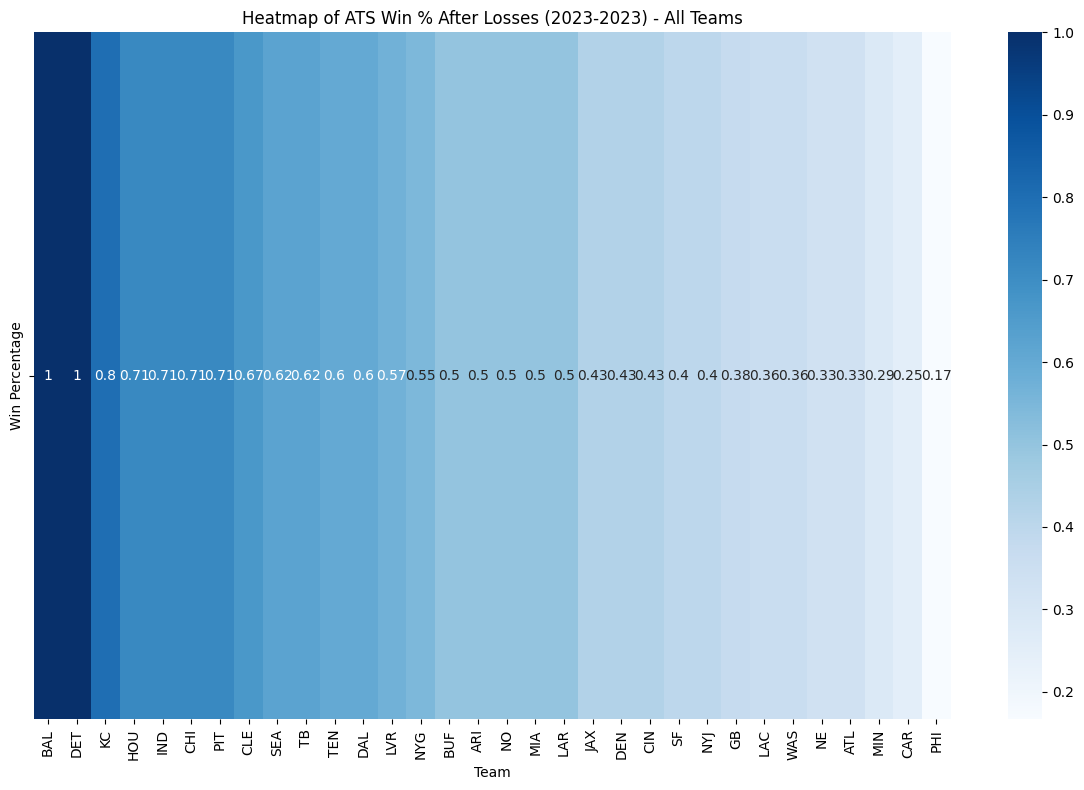

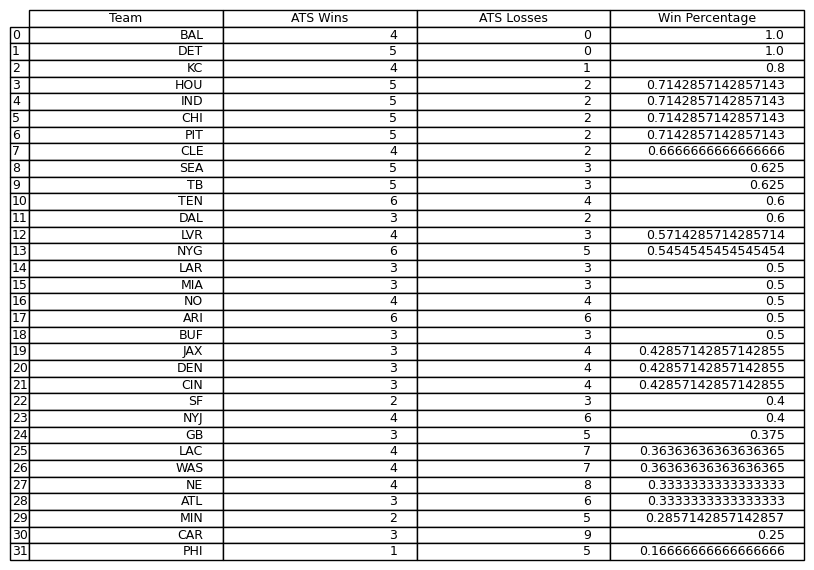

In [40]:
# Trying other charts ^

plt.figure(figsize=(12, 8))
plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['ATS Wins'], color='green', label='ATS Wins')
plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['ATS Losses'], left=all_teams_visual_filtered['ATS Wins'], color='red', label='ATS Losses')
plt.xlabel('Total Games After Straight-Up Losses')
plt.title(f'ATS Wins vs Losses ({start_year}-{end_year}) - All Teams')
plt.legend()
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(all_teams_visual_filtered[['Win Percentage']].set_index(all_teams_visual_filtered['Team']).T, annot=True, cmap='Blues')
plt.title(f'Heatmap of ATS Win % After Losses ({start_year}-{end_year}) - All Teams')
plt.tight_layout()
plt.show()

from pandas.plotting import table
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, frame_on=False)
table(ax, all_teams_visual_filtered[['Team', 'ATS Wins', 'ATS Losses', 'Win Percentage']].sort_values(by='Win Percentage', ascending=False), loc='center')
plt.axis('off')
# plt.title(f'ATS Results by Team ({start_year}-{end_year})')
plt.show()

# plt.figure(figsize=(10, 6))
# plt.scatter(all_teams_visual_filtered['Total Games'], all_teams_visual_filtered['Win Percentage'], color='blue')
# plt.xlabel('Total Games After Losses')
# plt.ylabel('ATS Win Percentage')
# plt.title(f'ATS Win % vs Total Games ({start_year}-{end_year})')
# for i, team in enumerate(all_teams_visual_filtered['Team']):
#     plt.text(all_teams_visual_filtered['Total Games'].iloc[i], all_teams_visual_filtered['Win Percentage'].iloc[i], team)
# plt.grid(True)
# plt.show()

---

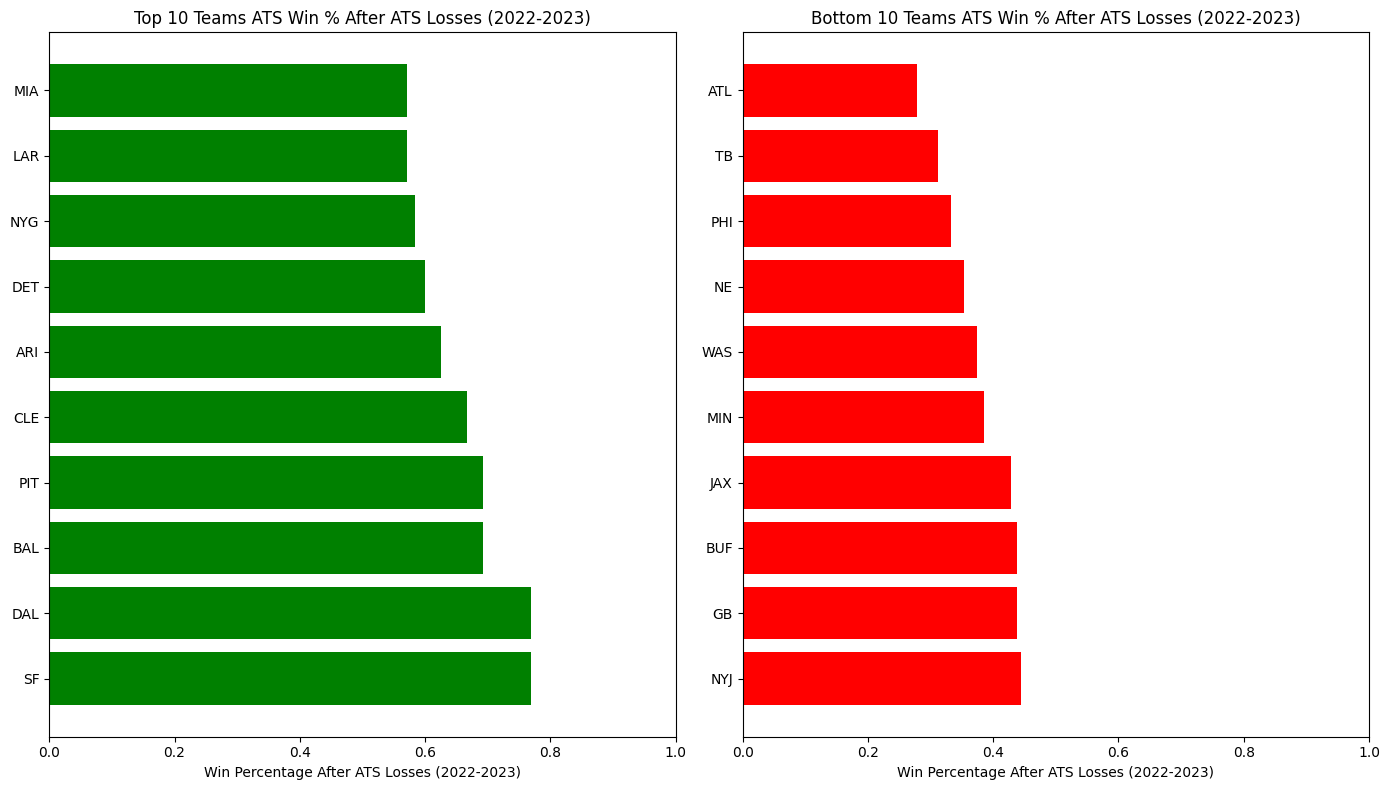

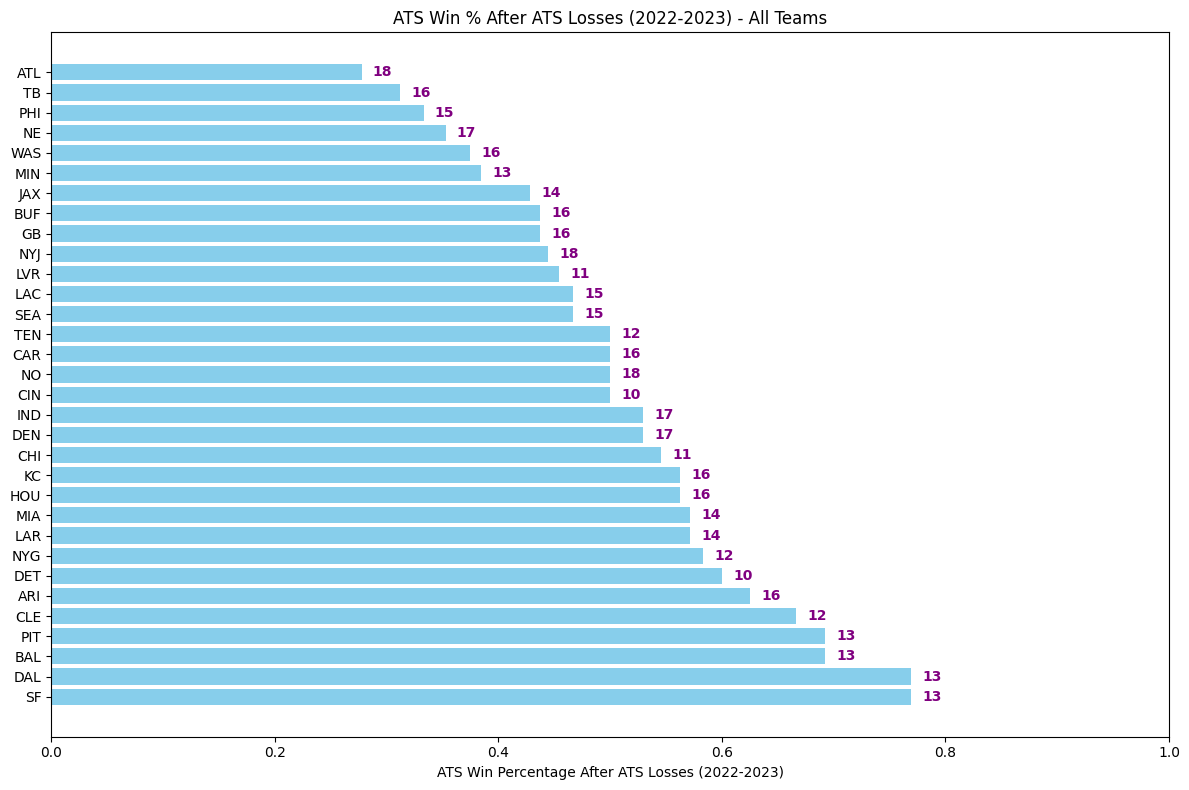

In [46]:
# ATS after ATS losses

df_ats_results = pd.read_csv('data/all_teams_ats_results_after_ATS_losses.csv')

# Filter the data to include only the 2022 and 2023 seasons
df_filtered = df_ats_results[df_ats_results['Season'].isin([2022, 2023])]

# Add Win Percentage column
df_filtered['Win Percentage'] = df_filtered['ATS Wins After Loss'] / (df_filtered['ATS Wins After Loss'] + df_filtered['ATS Losses After Loss'])

# Recalculate team performance for 2022 and 2023 seasons only
# team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins After Loss', 'ATS Losses', 'Win Percentage']].mean()
team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins After Loss', 'ATS Losses After Loss']].sum()
team_performance_filtered['Win Percentage'] = team_performance_filtered['ATS Wins After Loss'] / (team_performance_filtered['ATS Wins After Loss'] + team_performance_filtered['ATS Losses After Loss'])

# Sort teams based on their average win percentage across these two seasons
top_performers_filtered = team_performance_filtered.sort_values(by='Win Percentage', ascending=False)

# Find top 10 and bottom 10 performers
top_teams_filtered = top_performers_filtered.head(10)
bottom_teams_filtered = top_performers_filtered.tail(10)

# Top teams' ATS Win Percentage for 2022 and 2023
top_teams_visual_filtered = top_teams_filtered.reset_index()
bottom_teams_visual_filtered = bottom_teams_filtered.reset_index()

# # Visualization for 2022 and 2023 seasons
# plt.figure(figsize=(14, 8))

# # Bar plot for top 10 teams in 2022 and 2023
# plt.subplot(1, 2, 1)
# plt.barh(top_teams_visual_filtered['Team'], top_teams_visual_filtered['Win Percentage'], color='green')
# plt.xlabel('Win Percentage After ATS Losses (2022-2023)')
# plt.title('Top 10 Teams ATS Win % After ATS Losses (2022-2023)')
# plt.xlim(0, 1)

# # Bar plot for bottom 10 teams in 2022 and 2023
# plt.subplot(1, 2, 2)
# plt.barh(bottom_teams_visual_filtered['Team'], bottom_teams_visual_filtered['Win Percentage'], color='red')
# plt.xlabel('Win Percentage After ATS Losses (2022-2023)')
# plt.title('Bottom 10 Teams ATS Win % After ATS Losses (2022-2023)')
# plt.xlim(0, 1)
# plt.tight_layout()
# plt.show()

# Create a single graph with all 32 teams' ATS win percentages for 2022 and 2023
print()
plt.figure(figsize=(12, 8))
all_teams_visual_filtered = team_performance_filtered.reset_index().sort_values(by='Win Percentage', ascending=False)
all_teams_visual_filtered['Total Games'] = all_teams_visual_filtered['ATS Wins After Loss'] + all_teams_visual_filtered['ATS Losses After Loss']
plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['Win Percentage'], color='skyblue')
for index, value in enumerate(all_teams_visual_filtered['Win Percentage']): # Add the total games to the end of the bars
    total_games = all_teams_visual_filtered['Total Games'].iloc[index]
    # plt.text(value + 0.02, index, f'{int(total_games)}', va='center', fontsize=10, color='black')
    plt.text(value + 0.01, index, f'{int(total_games)}', va='center', color='purple', fontweight='bold')
plt.xlabel('ATS Win Percentage After ATS Losses (2022-2023)')
plt.title('ATS Win % After ATS Losses (2022-2023) - All Teams')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Enter the start year:  2023
Enter the end year (or leave blank for a single year):  



Team Performance (ATS After Losses) from 2023 to 2023
Team ATS Wins After Loss ATS Losses After Loss Win Percentage
 BAL                   5                     0           1.00
  KC                   5                     1           0.83
 DET                   4                     1           0.80
 CLE                   3                     1           0.75
  SF                   5                     2           0.71
 DAL                   5                     2           0.71
 PIT                   5                     2           0.71
 IND                   5                     2           0.71
  TB                   4                     2           0.67
 SEA                   4                     2           0.67
 MIA                   4                     2           0.67
 TEN                   5                     3           0.62
 HOU                   5                     3           0.62
 ARI                   4                     4           0.50
 LAR           

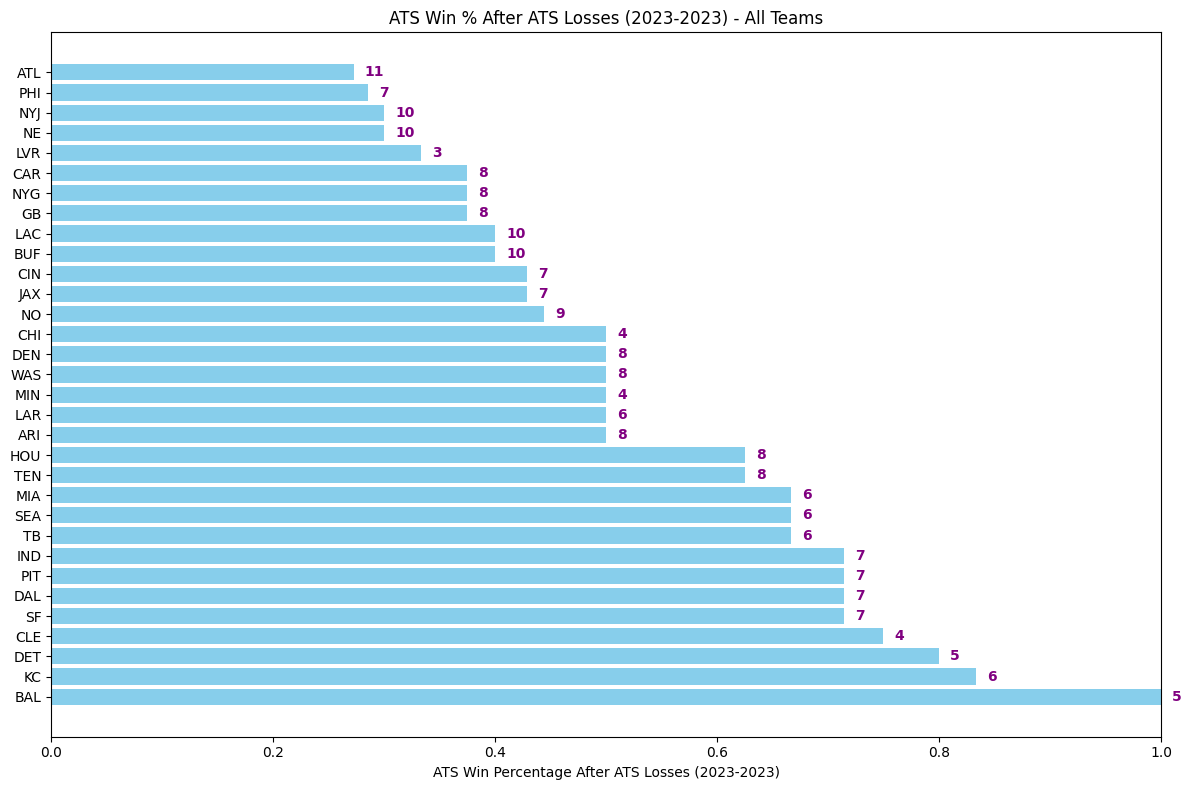

In [62]:
# ATS after ATS losses
# Function for dynamic year

start_year = int(input("Enter the start year: "))
end_year_input = input("Enter the end year (or leave blank for a single year): ")

# If no end year is provided, set it equal to the start year
if end_year_input == "":
    end_year = start_year
else:
    end_year = int(end_year_input)

# Load the CSV file
df_ats_results = pd.read_csv('data/all_teams_ats_results_after_ATS_losses.csv')

# Filter the data to include only the specified range of years
df_filtered = df_ats_results[(df_ats_results['Season'] >= start_year) & (df_ats_results['Season'] <= end_year)]

# Add Win Percentage column
df_filtered['Win Percentage'] = df_filtered['ATS Wins After Loss'] / (df_filtered['ATS Wins After Loss'] + df_filtered['ATS Losses After Loss'])

# Recalculate team performance for the specified seasons
team_performance_filtered = df_filtered.groupby('Team')[['ATS Wins After Loss', 'ATS Losses After Loss']].sum()
team_performance_filtered['Win Percentage'] = team_performance_filtered['ATS Wins After Loss'] / (team_performance_filtered['ATS Wins After Loss'] + team_performance_filtered['ATS Losses After Loss'])

# Sort teams based on their average win percentage across these seasons
top_performers_filtered = team_performance_filtered.sort_values(by='Win Percentage', ascending=False)

# Find top 10 and bottom 10 performers
top_teams_filtered = top_performers_filtered.head(10)
bottom_teams_filtered = top_performers_filtered.tail(10)

# Top teams' ATS Win Percentage
top_teams_visual_filtered = top_teams_filtered.reset_index()
bottom_teams_visual_filtered = bottom_teams_filtered.reset_index()

# # Visualization for the specified seasons
# plt.figure(figsize=(14, 8))

# # Bar plot for top 10 teams
# plt.subplot(1, 2, 1)
# plt.barh(top_teams_visual_filtered['Team'], top_teams_visual_filtered['Win Percentage'], color='green')
# plt.xlabel(f'Win Percentage After ATS Losses ({start_year}-{end_year})')
# plt.title(f'Top 10 Teams ATS Win % After ATS Losses ({start_year}-{end_year})')
# plt.xlim(0, 1)

# # Bar plot for bottom 10 teams
# plt.subplot(1, 2, 2)
# plt.barh(bottom_teams_visual_filtered['Team'], bottom_teams_visual_filtered['Win Percentage'], color='red')
# plt.xlabel(f'Win Percentage After ATS Losses ({start_year}-{end_year})')
# plt.title(f'Bottom 10 Teams ATS Win % After ATS Losses ({start_year}-{end_year})')
# plt.xlim(0, 1)
# plt.tight_layout()
# plt.show()

# Create a table printout with the results
# results_table = team_performance_filtered[['ATS Wins After Loss', 'ATS Losses After Loss', 'Win Percentage']].reset_index()
# results_table = results_table.sort_values(by='Win Percentage', ascending=False)
# styled_table = results_table.style.background_gradient(cmap='Blues').format({
#     'Win Percentage': '{:.2f}',
#     'ATS Wins After Loss': '{:.0f}',
#     'ATS Losses After Loss': '{:.0f}'
# }).set_caption(f"Team Performance (ATS After Losses) from {start_year} to {end_year}").set_table_styles(
#     [{'selector': 'table', 'props': [('width', '100%')]}]
# )
# display(styled_table)
results_table = team_performance_filtered[['ATS Wins After Loss', 'ATS Losses After Loss', 'Win Percentage']].reset_index()
results_table = results_table.sort_values(by='Win Percentage', ascending=False)
print(f"\nTeam Performance (ATS After Losses) from {start_year} to {end_year}")
print(results_table.to_string(index=False, formatters={
    'Win Percentage': '{:.2f}'.format,
    'ATS Wins After Loss': '{:.0f}'.format,
    'ATS Losses After Loss': '{:.0f}'.format
}))

# Create a single graph with all 32 teams' ATS win percentages for the specified seasons
print()
print()
plt.figure(figsize=(12, 8))
all_teams_visual_filtered = team_performance_filtered.reset_index().sort_values(by='Win Percentage', ascending=False)
all_teams_visual_filtered['Total Games'] = all_teams_visual_filtered['ATS Wins After Loss'] + all_teams_visual_filtered['ATS Losses After Loss']
plt.barh(all_teams_visual_filtered['Team'], all_teams_visual_filtered['Win Percentage'], color='skyblue')
for index, value in enumerate(all_teams_visual_filtered['Win Percentage']): 
    total_games = all_teams_visual_filtered['Total Games'].iloc[index]
    plt.text(value + 0.01, index, f'{int(total_games)}', va='center', color='purple', fontweight='bold')
plt.xlabel(f'ATS Win Percentage After ATS Losses ({start_year}-{end_year})')
plt.title(f'ATS Win % After ATS Losses ({start_year}-{end_year}) - All Teams')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# Analyze ATS losing streaks and ability to bounce back

In [12]:
import sqlite3
import pandas as pd

# List of NFL teams
teams = [
    'ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE',
    'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC',
    'LAC', 'LAR', 'LVR', 'MIA', 'MIN', 'NE', 'NO', 'NYG',
    'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS'
]

# Function to determine if a team covered the spread
def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
    if home_score is None or away_score is None:
        return "Game not played"
    
    spread_diff = home_score - away_score
    try:
        home_spread_float = float(home_spread)
        spread_result = spread_diff + home_spread_float
        if spread_result > 0:
            return home_team  # Home team covers
        elif spread_result < 0:
            return away_team  # Away team covers
        else:
            return "Push"     # Neither team covers
    except (ValueError, TypeError):
        return "Invalid spread"

# Connect to the SQLite database
db_path = 'data/nfl.db'
conn = sqlite3.connect(db_path)

# Query to get relevant data for all teams from 2020 to 2023 regular seasons
query_all_teams_2020_2023 = """
SELECT game_id, season, week, home_team, away_team, home_score, away_score, home_spread, away_spread
FROM Games
WHERE season BETWEEN 2020 AND 2023 AND game_type = 'REG';
"""

# Execute the query and load the results
all_scores_2020_2023 = conn.execute(query_all_teams_2020_2023).fetchall()

# Initialize a dictionary to track ATS records and losing streaks for each team
ats_streaks = {}

# Function to update ATS wins, losses, and streaks for teams
def update_ats_streak(team, result):
    if team not in ats_streaks:
        ats_streaks[team] = {'streak': 0, '1_loss_bounce_back': 0, '2_loss_bounce_back': 0, '3_loss_bounce_back': 0, 'total_bounces': 0, 'total_ats_wins': 0}
    
    # If the team loses the ATS
    if result != team and result != "Push" and result != "Invalid spread" and result != "Game not played":
        ats_streaks[team]['streak'] += 1
    # If the team wins the ATS (bounce back scenario)
    elif result == team:
        if ats_streaks[team]['streak'] == 1:
            ats_streaks[team]['1_loss_bounce_back'] += 1
        elif ats_streaks[team]['streak'] == 2:
            ats_streaks[team]['2_loss_bounce_back'] += 1
        elif ats_streaks[team]['streak'] == 3:
            ats_streaks[team]['3_loss_bounce_back'] += 1
        ats_streaks[team]['total_bounces'] += 1
        ats_streaks[team]['total_ats_wins'] += 1
        ats_streaks[team]['streak'] = 0  # Reset streak after bounce back

# Calculate ATS streaks for all teams using the corrected logic
for game in all_scores_2020_2023:
    game_id, season, week, home_team, away_team, home_score, away_score, home_spread, away_spread = game
    winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
    
    # Update records for home and away teams
    update_ats_streak(home_team, winner)
    update_ats_streak(away_team, winner)

# Convert the streak data into a DataFrame for analysis
streak_data = []

for team, streak_info in ats_streaks.items():
    streak_data.append([
        team,
        streak_info['1_loss_bounce_back'],
        streak_info['2_loss_bounce_back'],
        streak_info['3_loss_bounce_back'],
        streak_info['total_bounces'],
        streak_info['total_ats_wins']
    ])

df_ats_streaks = pd.DataFrame(streak_data, columns=[
    "Team", "Bounce Back After 1 Loss", "Bounce Back After 2 Losses", "Bounce Back After 3 Losses", "Total Bounces", "Total ATS Wins"
])

# Calculate bounce-back percentages
df_ats_streaks['Bounce Back % After 1 Loss'] = df_ats_streaks['Bounce Back After 1 Loss'] / (df_ats_streaks['Bounce Back After 1 Loss'] + df_ats_streaks['Total ATS Wins'] - df_ats_streaks['Bounce Back After 1 Loss']) * 100
df_ats_streaks['Bounce Back % After 2 Losses'] = df_ats_streaks['Bounce Back After 2 Losses'] / (df_ats_streaks['Bounce Back After 2 Losses'] + df_ats_streaks['Total ATS Wins'] - df_ats_streaks['Bounce Back After 2 Losses']) * 100
df_ats_streaks['Bounce Back % After 3 Losses'] = df_ats_streaks['Bounce Back After 3 Losses'] / (df_ats_streaks['Bounce Back After 3 Losses'] + df_ats_streaks['Total ATS Wins'] - df_ats_streaks['Bounce Back After 3 Losses']) * 100

# Sort by Total Bounces for better insights
df_ats_streaks_sorted = df_ats_streaks.sort_values(by='Total Bounces', ascending=False)

# Display the sorted DataFrame for analysis
# print(df_ats_streaks_sorted)
display(df_ats_streaks_sorted)


,Team,Bounce Back After 1 Loss,Bounce Back After 2 Losses,Bounce Back After 3 Losses,Total Bounces,Total ATS Wins,Bounce Back % After 1 Loss,Bounce Back % After 2 Losses,Bounce Back % After 3 Losses
10,DET,11,5,0,41,41,26.829268,12.195122,0.000000
17,MIA,11,3,0,39,39,28.205128,7.692308,0.000000
15,GB,7,5,1,39,39,17.948718,12.820513,2.564103
20,CIN,5,7,2,38,38,13.157895,18.421053,5.263158
29,PIT,13,1,3,38,38,34.210526,2.631579,7.894737
27,DAL,12,3,1,37,37,32.432432,8.108108,2.702703
24,SF,13,2,3,36,36,36.111111,5.555556,8.333333
28,NYG,12,2,1,36,36,33.333333,5.555556,2.777778
6,BUF,7,4,1,35,35,20.000000,11.428571,2.857143
25,ARI,9,6,1,34,34,26.470588,17.647059,2.941176


### League Averages (2020-2023)

Here are the averages of the key bounce-back metrics across all teams for comparison:

1. **Average Bounce Back % After 1 Loss:** 26.18%
2. **Average Bounce Back % After 2 Losses:** 11.98%
3. **Average Bounce Back % After 3 Losses:** 6.09%
4. **Average Total Bounces:** 32.59
5. **Average Total ATS Wins:** 32.59

### Comparison with Lions and Cowboys:
- **Lions:** Their bounce-back rate after 1 loss (26.8%) is slightly above the league average, while they fall below average after 2 and 3 losses.
- **Cowboys:** The Cowboys outperform the league average after 1 loss (32.4%) but fall below average after 2 and 3 losses, especially after 3 losses.

This comparison highlights that both teams are better than average after 1 ATS loss, but struggle more than the average after extended losing streaks.

Let me know if you'd like to analyze more teams or aspects!

In [ ]:
# Calculate the averages of bounce-back metrics for all teams

# Calculate the overall averages from the df_ats_streaks DataFrame for comparison
averages = {
    'Average Bounce Back % After 1 Loss': df_ats_streaks['Bounce Back % After 1 Loss'].mean(),
    'Average Bounce Back % After 2 Losses': df_ats_streaks['Bounce Back % After 2 Losses'].mean(),
    'Average Bounce Back % After 3 Losses': df_ats_streaks['Bounce Back % After 3 Losses'].mean(),
    'Average Total Bounces': df_ats_streaks['Total Bounces'].mean(),
    'Average Total ATS Wins': df_ats_streaks['Total ATS Wins'].mean()
}

averages

In [ ]:
# # ATS Record Without Playoffs Backup

# db_path = 'data/nfl.db'
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Function to determine if a team covered the spread
# def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
#     if home_score is None or away_score is None:
#         return "Game not played"
    
#     spread_diff = home_score - away_score
#     try:
#         home_spread_float = float(home_spread)
#         spread_result = spread_diff + home_spread_float
#         if spread_result > 0:
#             return home_team
#         elif spread_result < 0:
#             return away_team
#         else:
#             return "Push"
#     except (ValueError, TypeError):
#         return "Invalid spread"

# # Query to retrieve all Cowboys and Lions regular season games from 2022
# query_cowboys_2022_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2022 AND game_type = 'REG';
# """

# query_lions_2022_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2022 AND game_type = 'REG';
# """

# # Query to retrieve all Cowboys and Lions regular season games from 2023
# query_cowboys_2023_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2023 AND game_type = 'REG';
# """

# query_lions_2023_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2023 AND game_type = 'REG';
# """

# query_cowboys_2024_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2024 AND game_type = 'REG';
# """

# query_lions_2024_reg = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2024 AND game_type = 'REG';
# """

# # Execute the queries for 2022 and 2023 regular seasons
# cursor.execute(query_cowboys_2022_reg)
# cowboys_scores_2022_reg = cursor.fetchall()

# cursor.execute(query_lions_2022_reg)
# lions_scores_2022_reg = cursor.fetchall()

# cursor.execute(query_cowboys_2023_reg)
# cowboys_scores_2023_reg = cursor.fetchall()

# cursor.execute(query_lions_2023_reg)
# lions_scores_2023_reg = cursor.fetchall()

# cursor.execute(query_cowboys_2024_reg)
# cowboys_scores_2024_reg = cursor.fetchall()

# cursor.execute(query_lions_2024_reg)
# lions_scores_2024_reg = cursor.fetchall()

# # Close the connection
# conn.close()

# # Initialize variables to track ATS records for regular season only
# cowboys_ats_wins_2022_reg, cowboys_ats_losses_2022_reg = 0, 0
# lions_ats_wins_2022_reg, lions_ats_losses_2022_reg = 0, 0
# cowboys_ats_wins_2023_reg, cowboys_ats_losses_2023_reg = 0, 0
# lions_ats_wins_2023_reg, lions_ats_losses_2023_reg = 0, 0
# cowboys_ats_wins_2024_reg, cowboys_ats_losses_2024_reg = 0, 0
# lions_ats_wins_2024_reg, lions_ats_losses_2024_reg = 0, 0

# # Calculate Cowboys ATS record for 2022 regular season
# for game in cowboys_scores_2022_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DAL":
#         cowboys_ats_wins_2022_reg += 1
#     elif winner == away_team or winner == home_team:
#         cowboys_ats_losses_2022_reg += 1

# # Calculate Lions ATS record for 2022 regular season
# for game in lions_scores_2022_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DET":
#         lions_ats_wins_2022_reg += 1
#     elif winner == away_team or winner == home_team:
#         lions_ats_losses_2022_reg += 1

# # Calculate Cowboys ATS record for 2023 regular season
# for game in cowboys_scores_2023_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DAL":
#         cowboys_ats_wins_2023_reg += 1
#     elif winner == away_team or winner == home_team:
#         cowboys_ats_losses_2023_reg += 1

# # Calculate Lions ATS record for 2023 regular season
# for game in lions_scores_2023_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DET":
#         lions_ats_wins_2023_reg += 1
#     elif winner == away_team or winner == home_team:
#         lions_ats_losses_2023_reg += 1

# for game in cowboys_scores_2024_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DAL":
#         cowboys_ats_wins_2024_reg += 1
#     elif winner == away_team or winner == home_team:
#         cowboys_ats_losses_2024_reg += 1

# for game in lions_scores_2024_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DET":
#         lions_ats_wins_2024_reg += 1
#     elif winner == away_team or winner == home_team:
#         lions_ats_losses_2024_reg += 1

# # Print the results for both regular seasons
# print(f"Cowboys 2023 REG Season ATS: {cowboys_ats_wins_2023_reg}W - {cowboys_ats_losses_2023_reg}L")
# print(f"Cowboys 2022 REG Season ATS: {cowboys_ats_wins_2022_reg}W - {cowboys_ats_losses_2022_reg}L")
# print(f"Cowboys 2024 REG Season ATS: {cowboys_ats_wins_2024_reg}W - {cowboys_ats_losses_2024_reg}L")
# print()
# print(f"Lions 2024 REG Season ATS: {lions_ats_wins_2024_reg}W - {lions_ats_losses_2024_reg}L")
# print(f"Lions 2023 REG Season ATS: {lions_ats_wins_2023_reg}W - {lions_ats_losses_2023_reg}L")
# print(f"Lions 2022 REG Season ATS: {lions_ats_wins_2022_reg}W - {lions_ats_losses_2022_reg}L")

# # All ATS Losses from ^
# # Store the losing games for Cowboys and Lions
# cowboys_losing_games_2022 = []
# cowboys_losing_games_2023 = []
# lions_losing_games_2022 = []
# lions_losing_games_2023 = []
# cowboys_losing_games_2024 = []
# lions_losing_games_2024 = []

# # Calculate Cowboys and Lions losses for 2022 and 2023 regular seasons
# for game in cowboys_scores_2022_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner != "DAL" and winner != "Push":
#         cowboys_losing_games_2022.append(game)

# for game in cowboys_scores_2023_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner != "DAL" and winner != "Push":
#         cowboys_losing_games_2023.append(game)

# for game in lions_scores_2022_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner != "DET" and winner != "Push":
#         lions_losing_games_2022.append(game)

# for game in lions_scores_2023_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner != "DET" and winner != "Push":
#         lions_losing_games_2023.append(game)
        
# for game in lions_scores_2024_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     if home_score is not None and away_score is not None:  # Only process played games
#         winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#         if winner != "DET" and winner != "Push":
#             lions_losing_games_2024.append(game)

# for game in cowboys_scores_2024_reg:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     if home_score is not None and away_score is not None:  # Only process played games
#         winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#         if winner != "DAL" and winner != "Push":
#             cowboys_losing_games_2024.append(game)
        
# # Convert to DataFrame for display
# df_cowboys_losses_2022 = pd.DataFrame(cowboys_losing_games_2022, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# df_cowboys_losses_2023 = pd.DataFrame(cowboys_losing_games_2023, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# df_cowboys_losses_2024 = pd.DataFrame(cowboys_losing_games_2024, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# df_lions_losses_2022 = pd.DataFrame(lions_losing_games_2022, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# df_lions_losses_2023 = pd.DataFrame(lions_losing_games_2023, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# df_lions_losses_2024 = pd.DataFrame(lions_losing_games_2024, columns=[
#     'Game ID', 'Week', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Home Spread', 'Away Spread'])

# # Print the tables
# print()
# print("\n============================== Cowboys 2022 Losses ==============================")
# display(df_cowboys_losses_2022)
# print("\n============================== Cowboys 2023 Losses ==============================")
# display(df_cowboys_losses_2023)
# print("\n============================== Cowboys 2024 Losses ==============================")
# display(df_cowboys_losses_2024)
# print("\n============================== Lions 2022 Losses ================================")
# display(df_lions_losses_2022)
# print("\n============================== Lions 2023 Losses ================================")
# display(df_lions_losses_2023)
# print("\n============================== Lions 2024 Losses ================================")
# display(df_lions_losses_2024)

In [ ]:
# # ATS Record With Playoffs

# db_path = 'data/nfl.db'
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Reuse the spread calculation function
# def determine_spread_winner(home_team, away_team, home_score, away_score, home_spread):
#     if home_score is None or away_score is None:
#         return "Game not played"
    
#     spread_diff = home_score - away_score
#     try:
#         home_spread_float = float(home_spread)
#         spread_result = spread_diff + home_spread_float
#         if spread_result > 0:
#             return home_team
#         elif spread_result < 0:
#             return away_team
#         else:
#             return "Push"
#     except (ValueError, TypeError):
#         return "Invalid spread"

# # Query to retrieve all Cowboys and Lions games from the 2022 season with final scores and spreads
# query_cowboys_2022 = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2022;
# """

# query_lions_2022 = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2022;
# """

# # Query to retrieve all Cowboys and Lions games from the 2023 season with final scores and spreads
# query_cowboys_2023 = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DAL' OR away_team = 'DAL') AND season = 2023;
# """

# query_lions_2023 = """
# SELECT game_id, home_team, away_team, home_score, away_score, home_spread, away_spread
# FROM Games
# WHERE (home_team = 'DET' OR away_team = 'DET') AND season = 2023;
# """

# # Execute the queries for 2022 and 2023
# cursor.execute(query_cowboys_2022)
# cowboys_scores_2022 = cursor.fetchall()

# cursor.execute(query_lions_2022)
# lions_scores_2022 = cursor.fetchall()

# cursor.execute(query_cowboys_2023)
# cowboys_scores_2023 = cursor.fetchall()

# cursor.execute(query_lions_2023)
# lions_scores_2023 = cursor.fetchall()

# # Close the connection
# conn.close()

# # Initialize variables to track ATS records for 2022 and 2023
# cowboys_ats_wins_2022, cowboys_ats_losses_2022 = 0, 0
# lions_ats_wins_2022, lions_ats_losses_2022 = 0, 0
# cowboys_ats_wins_2023, cowboys_ats_losses_2023 = 0, 0
# lions_ats_wins_2023, lions_ats_losses_2023 = 0, 0

# # Calculate Cowboys ATS record for 2022
# for game in cowboys_scores_2022:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DAL":
#         cowboys_ats_wins_2022 += 1
#     elif winner == away_team or winner == home_team:
#         cowboys_ats_losses_2022 += 1

# # Calculate Lions ATS record for 2022
# for game in lions_scores_2022:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DET":
#         lions_ats_wins_2022 += 1
#     elif winner == away_team or winner == home_team:
#         lions_ats_losses_2022 += 1

# # Calculate Cowboys ATS record for 2023
# for game in cowboys_scores_2023:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DAL":
#         cowboys_ats_wins_2023 += 1
#     elif winner == away_team or winner == home_team:
#         cowboys_ats_losses_2023 += 1

# # Calculate Lions ATS record for 2023
# for game in lions_scores_2023:
#     game_id, home_team, away_team, home_score, away_score, home_spread, away_spread = game
#     winner = determine_spread_winner(home_team, away_team, home_score, away_score, home_spread)
#     if winner == "DET":
#         lions_ats_wins_2023 += 1
#     elif winner == away_team or winner == home_team:
#         lions_ats_losses_2023 += 1

# # # Return the results for both years
# # (cowboys_ats_wins_2022, cowboys_ats_losses_2022, lions_ats_wins_2022, lions_ats_losses_2022,
# #  cowboys_ats_wins_2023, cowboys_ats_losses_2023, lions_ats_wins_2023, lions_ats_losses_2023)
# results = (cowboys_ats_wins_2022, cowboys_ats_losses_2022, lions_ats_wins_2022, lions_ats_losses_2022,
#            cowboys_ats_wins_2023, cowboys_ats_losses_2023, lions_ats_wins_2023, lions_ats_losses_2023)
# (cowboys_ats_wins_2022, cowboys_ats_losses_2022, lions_ats_wins_2022, lions_ats_losses_2022,
#  cowboys_ats_wins_2023, cowboys_ats_losses_2023, lions_ats_wins_2023, lions_ats_losses_2023) = results
# print(f"Cowboys 2023: {cowboys_ats_wins_2023}W - {cowboys_ats_losses_2023}L")
# print(f"Cowboys 2022: {cowboys_ats_wins_2022}W - {cowboys_ats_losses_2022}L")
# print(f"Lions 2023: {lions_ats_wins_2023}W - {lions_ats_losses_2023}L")
# print(f"Lions 2022: {lions_ats_wins_2022}W - {lions_ats_losses_2022}L")